In [90]:
import pandas as pd
import numpy as np

df_heart = pd.read_csv('../dataset/heart.csv')
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [91]:
df_heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0, 0.5, '心率')

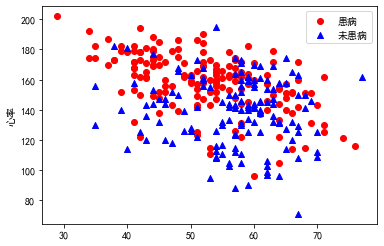

In [104]:
import matplotlib.pyplot as plt

# 以年龄+最大心率作为输入，绘制散点图
plt.scatter(x=df_heart.age[df_heart.target ==1],y=df_heart.thalach[df_heart.target==1], c="red")
plt.scatter(x=df_heart.age[df_heart.target ==0],y=df_heart.thalach[df_heart.target==0], c="blue",marker='^')
plt.legend(['患病','未患病'])
plt.ylabel('心率')

In [93]:
X=df_heart.drop(['target'],axis=1)
y=df_heart.target.values
y=y.reshape(-1,1)

print('X的形状',X.shape)
print('Y的形状',y.shape)

X的形状 (303, 13)
Y的形状 (303, 1)


In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [95]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [96]:
def sigmoid(z):
    y=1/(1+np.exp(-z))
    return y

In [110]:
# def loss_function(X,y,w,b):
#     y_hat = sigmoid(np.dot(X,w) + b)
#     loss = -(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
#     cost = np.sum(loss) / X.shape[0]
#     return cost
# 然后定义损失函数
def loss_function(X,y,w,b):
    y_hat = sigmoid(np.dot(X,w) + b) # Sigmoid逻辑函数 + 线性函数(wX+b)得到y'
    loss = -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) # 计算损失
    cost = np.sum(loss) / X.shape[0]  # 整个数据集平均损失    
    return cost # 返回整个数据集平均损失

In [111]:
def gradient_descent(X, y, w, b, lr, iter):
    l_history = np.zeros(iter)
    w_history = np.zeros((iter, w.shape[0], w.shape[1]))
    b_history = np.zeros(iter)
    
    for i in range(iter):
        y_hat = sigmoid(np.dot(X,w)+b)
        loss = -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
        # derivative_w = np.dot(X.T, (y_hat-y))/X.shape[0]
        derivative_w = np.dot(X.T,((y_hat-y)))/X.shape[0]  # 给权重向量求导
        derivative_b = np.sum(y_hat-y)/X.shape[0]
        w=w-lr*derivative_w
        b=b-lr*derivative_b
        l_history[i]=loss_function(X,y,w,b)
        # print('轮次', i+1, '当前轮训练集损失:',l_history[i])
        w_history[i]=w
        b_history[i]=b
    
    return l_history,w_history,b_history

In [99]:
def predict(X,w,b):
    z=np.dot(X,w)+b
    y_hat=sigmoid(z)
    print(y_hat.shape)
    y_pred=np.zeros((y_hat.shape[0],1))
    for i in range(y_hat.shape[0]):
        if y_hat[i,0]<0.5:
            y_pred[i,0]=0
        else:
            y_pred[i,0]=1
    return y_pred

In [106]:
# 封装逻辑回归模型
def logistic_regression(X,y,w,b,lr,iter):
    l_history,w_history,b_history=gradient_descent(X,y,w,b,lr,iter)
    print('训练最终损失：',l_history[-1])
    y_pred=predict(X,w_history[-1],b_history[-1])
    traing_acc=100-np.mean(np.abs(y_pred-y_train))*100
    print(np.mean(np.abs(y_pred-y_train)))
    print('逻辑回归训练准确率：{:.2f}%'.format(traing_acc))
    return l_history,w_history,b_history

In [107]:
dimension=X.shape[1]
weight=np.full((dimension,1),0.1)
bias=0
alpha=1
iterations=500

In [108]:
loss_history,weight_history,bias_history = logistic_regression(X_train,y_train,weight,bias,alpha,iterations)

训练最终损失： 0.3651766396640322
(242, 1)
0.16115702479338842
逻辑回归训练准确率：83.88%


Text(0, 0.5, '损失')

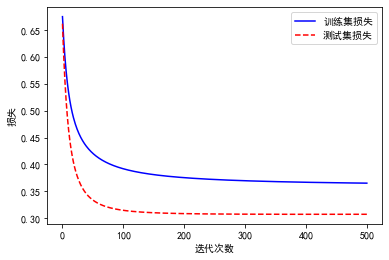

In [114]:
# 绘制损失曲线
loss_history_test=np.zeros(iterations)

for i in range(iterations):
    loss_history_test[i]=loss_function(X_test,y_test,weight_history[i],bias_history[i])

# 构建x轴数据
index=np.arange(0,iterations,1)

plt.plot(index,loss_history,c="blue",linestyle="solid")    
plt.plot(index,loss_history_test,c='red',linestyle="dashed")
plt.legend(['训练集损失','测试集损失'])
plt.xlabel('迭代次数')
plt.ylabel('损失')